In [189]:
# !git clone https://github.com/9Tribez17/QF_Group12.git

In [190]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocess

In [191]:
data = pd.read_csv('data/addfeature.csv')
data_ori = pd.read_csv('data/clean_churn.csv')

In [192]:
# Check the objective column is in the data_feature
print('Exited' in data.columns)

True


In [193]:
data_ori.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,original
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0,1
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0,1
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0,1
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0,1
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0,1


In [194]:
data.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Age_EstimatedSalary_difference,Tenure_EstimatedSalary_difference,Balance_EstimatedSalary_difference,NumOfProducts_EstimatedSalary_difference,CreditScore_EstimatedSalary_difference,Age_NumOfProducts_difference,Tenure_NumOfProducts_difference,Balance_NumOfProducts_difference,EstimatedSalary_NumOfProducts_difference,CreditScore_NumOfProducts_difference
0,15674932,Okwudilichukwu,0.636,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,...,-0.704576,-0.607279,-0.907279,-0.573945,-0.271279,-0.130631,-0.033333,-0.333333,0.573945,0.302667
1,15749177,Okwudiliolisa,0.554,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,...,-0.044781,-0.147483,-0.247483,0.085850,0.306517,-0.130631,-0.233333,-0.333333,-0.085850,0.220667
2,15694510,Hsueh,0.656,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,...,-0.627067,0.075636,-0.924364,-0.591030,-0.268364,-0.036036,0.666667,-0.333333,0.591030,0.322667
3,15741417,Kao,0.462,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,...,-0.206571,-0.222787,0.170612,-0.422787,0.039213,0.216216,0.200000,0.593398,0.422787,0.462000
4,15766172,Chiemenam,0.732,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,...,0.127409,0.424707,-0.075293,0.258040,0.656707,-0.130631,0.166667,-0.333333,-0.258040,0.398667


In [195]:
# Check whether there is nan value

nan_counts = data.isna().sum()
print(nan_counts)

# nan_counts = data_ori.isna().sum()
# print(nan_counts)

CustomerId                                  0
Surname                                     0
CreditScore                                 0
Age                                         0
Tenure                                      0
                                           ..
Age_NumOfProducts_difference                0
Tenure_NumOfProducts_difference             0
Balance_NumOfProducts_difference            0
EstimatedSalary_NumOfProducts_difference    0
CreditScore_NumOfProducts_difference        0
Length: 76, dtype: int64


In [196]:
x = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

# Check the nan value again
data_train.columns[data_train.isna().any()].tolist()

[]

## Feature selection

### Univariate statistical tests

In [197]:
def importance_test(data):
    # Chi-squared test
    chi_test_columns = ['MaleGender_OHE', 'FranceGeography_OHE', 'SpainGeography_OHE']
    x = data[chi_test_columns]
    y = data['Exited']
    chi_scores = chi2(x, y)
    chi_scores_df = pd.DataFrame({'Feature': chi_test_columns, 'Chi2 Score': chi_scores[0], 'P-value': chi_scores[1]})

    # Mutual Information test
    x = data.drop(['Surname', 'CustomerId', 'Exited'], axis=1)
    mul_scores = mutual_info_classif(x, y)
    mul_scores_df = pd.DataFrame({'Feature': x.columns, 'Mul Score': mul_scores})
    return chi_scores_df, mul_scores_df

In [198]:
chi_scores_df, mul_scores_df = importance_test(data_train)

In [199]:
chi_scores_df

,Feature,Chi2 Score,P-value
0,MaleGender_OHE,1245.201466,9.160292e-273
1,FranceGeography_OHE,991.739375,1.121593e-217
2,SpainGeography_OHE,279.792329,8.333958e-63


In [200]:
mul_scores_df

,Feature,Mul Score
0,CreditScore,0.004192
1,Age,0.082867
2,Tenure,0.001674
3,Balance,0.015571
4,NumOfProducts,0.097557
...,...,...
68,Age_NumOfProducts_difference,0.147830
69,Tenure_NumOfProducts_difference,0.089287
70,Balance_NumOfProducts_difference,0.103932
71,EstimatedSalary_NumOfProducts_difference,0.070509


### Correlation check

In [201]:
def correlation_test(data_):
    data = data_.copy()
    drop_columns = ['Surname', 'CustomerId', 'Exited']
    data = data.drop(drop_columns, axis=1)
    data_corr = data.corr()
    return data_corr
    

In [202]:
data_corr = correlation_test(data_train)

### Selection

In [203]:
correlation_threshold = 0.9
num_feature_selected = 10

sorted_features = mul_scores_df.sort_values(by='Mul Score', ascending=False)['Feature']

selected_features = []

for feature in sorted_features:
    if len(selected_features) >= num_feature_selected:
        break
    
    if selected_features:
        correlations = data_corr.loc[feature, selected_features].abs()
        if all(correlations < correlation_threshold):
            selected_features.append(feature)
    else:
        selected_features.append(feature)

print("Selected features:", selected_features)


Selected features: ['NumOfProducts_Age_difference', 'Mean_Age_NumOfProducts', 'Mean_NumOfProducts_Balance', 'Balance_NumOfProducts_difference', 'NumOfProducts', 'Mean_CreditScore_NumOfProducts', 'CreditScore_NumOfProducts_difference', 'NumOfProducts_Tenure_difference', 'Mean_Tenure_NumOfProducts', 'CreditScore_Age_difference']


## Load the features

In [204]:
X_train = data_train[selected_features]
y_train = data_train['Exited']

X_test = data_test[selected_features]
y_test = data_test['Exited']

X_train.head()

,NumOfProducts_Age_difference,Mean_Age_NumOfProducts,Mean_NumOfProducts_Balance,Balance_NumOfProducts_difference,NumOfProducts,Mean_CreditScore_NumOfProducts,CreditScore_NumOfProducts_difference,NumOfProducts_Tenure_difference,Mean_Tenure_NumOfProducts,CreditScore_Age_difference
142711,0.144144,0.261261,0.489105,0.311544,0.333333,0.570667,0.474667,0.233333,0.216667,0.618811
65962,-0.432432,0.216216,0.000000,0.000000,0.000000,0.207000,0.414000,-0.900000,0.450000,-0.018432
147234,0.063063,0.301802,0.441553,0.216439,0.333333,0.448667,0.230667,0.133333,0.266667,0.293730
6533,-0.031532,0.349099,0.411376,0.156084,0.333333,0.432667,0.198667,-0.066667,0.366667,0.167135
8576,0.049550,0.308559,0.166667,-0.333333,0.333333,0.398667,0.130667,-0.166667,0.416667,0.180216


In [205]:
def randomforest_method(X_train, X_test, y_train, y_test):
    """
    Use random forest method to fit the model.
    """
    gb = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

    # train
    gb.fit(X_train, y_train)

    # predict
    predictions = gb.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, predictions))
    mask_zero = y_test == 0
    accuracy_zero = accuracy_score(y_test[mask_zero], predictions[np.array(mask_zero).flatten()])
    print('Accuracy when Exited = 0: ', accuracy_zero)

    mask_one = y_test == 1
    accuracy_one = accuracy_score(y_test[mask_one], predictions[np.array(mask_one).flatten()])
    print('Accuracy when Exited = 1: ', accuracy_one)

    model_result = pd.DataFrame({'test_true': y_test, 'test_predict': predictions})

    return model_result, accuracy_zero, accuracy_one

In [206]:
rf_result, rf_accuracy_zero, rf_accuracy_one = randomforest_method(X_train, X_test, y_train, y_test)

Accuracy: 0.8458593995486617
Accuracy when Exited = 0:  0.9404408033060248
Accuracy when Exited = 1:  0.49427300902843285


In [207]:
def gradientboosting_method(X_train, X_test, y_train, y_test):
    """
    Use random forest method to fit the model.
    """
    gb = GradientBoostingClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

    # train
    gb.fit(X_train, y_train)

    # predict
    predictions = gb.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, predictions))
    mask_zero = y_test == 0
    accuracy_zero = accuracy_score(y_test[mask_zero], predictions[np.array(mask_zero).flatten()])
    print('Accuracy when Exited = 0: ', accuracy_zero)

    mask_one = y_test == 1
    accuracy_one = accuracy_score(y_test[mask_one], predictions[np.array(mask_one).flatten()])
    print('Accuracy when Exited = 1: ', accuracy_one)

    model_result = pd.DataFrame({'test_true': y_test, 'test_predict': predictions})

    return model_result, accuracy_zero, accuracy_one

In [208]:
gb_result, gb_accuracy_zero, gb_accuracy_one = gradientboosting_method(X_train, X_test, y_train, y_test)

Accuracy: 0.8416031079498386
Accuracy when Exited = 0:  0.9385195388965417
Accuracy when Exited = 1:  0.48133674706912816


In [209]:
class SimpleBinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SimpleBinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 2*input_dim)  # first hidden layer
        self.fc2 = nn.Linear(2*input_dim, input_dim)
        self.fc3 = nn.Linear(input_dim, 1)          # output layer

    def forward(self, x):
        x = (self.fc1(x))
        x = (self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

def neural_network_method(X_train, X_test, y_train, y_test):
    X_train = torch.tensor(np.array(X_train), dtype=torch.float32)
    y_train = torch.tensor(np.array(y_train), dtype=torch.float32).view(-1, 1)
    X_test = torch.tensor(np.array(X_test), dtype=torch.float32)
    y_test = torch.tensor(np.array(y_test), dtype=torch.float32).view(-1, 1)
    
    model = SimpleBinaryClassifier(X_train.shape[1])
    
    # loss function
    criterion = nn.BCELoss()

    # optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # fit
    model.train()
    for epoch in range(100): 
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
    
    # evaluate
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs > 0.5).float()
        
        accuracy = (predictions.eq(y_test).sum().item()) / y_test.size(0)
        # Calculate the accuracy when Exited = 0
        mask_zero = (y_test == 0)
        correct_zero = (predictions[mask_zero] == y_test[mask_zero]).float().sum().item()
        accuracy_zero = correct_zero / mask_zero.sum().item()
        print('Accuracy when Exited = 0: ', accuracy_zero)

        # Calculate the accuracy when Exited = 1
        mask_one = (y_test == 1)
        correct_one = (predictions[mask_one] == y_test[mask_one]).float().sum().item()
        accuracy_one = correct_one / mask_one.sum().item()
        print('Accuracy when Exited = 1: ', accuracy_one)
        
        loss = criterion(outputs, y_test)
    
    print(f"Test Loss: {loss.item()}, Test Accuracy: {accuracy}")

    predictions = predictions.cpu().numpy()
    y_test = y_test.cpu().numpy()

    model_result = pd.DataFrame({'test_true': y_test.flatten(), 'test_predict': predictions.flatten()})

    return model_result, accuracy_zero, accuracy_one


In [210]:
nn_result, nn_accuracy_zero, nn_accuracy_one = neural_network_method(X_train, X_test, y_train, y_test)

Accuracy when Exited = 0:  0.9606684550134126
Accuracy when Exited = 1:  0.19646947850693977
Test Loss: 0.44903960824012756, Test Accuracy: 0.7986688376610392


## Plot figure

In [211]:
def plotting(accuracy_zero, accuracy_one, name):
    bars = plt.bar(['Not Exited (0)', 'Exited (1)'], [accuracy_zero, accuracy_one], width=0.4, color=['skyblue', 'salmon'], align='center')
    plt.title(name + ': Accuracy of Prediction about Exited Customers')
    plt.xlabel('Exited')
    plt.ylabel('accuracy')
    plt.text(bars[0].get_x() + bars[0].get_width()/2, accuracy_zero, accuracy_zero, ha='center', va='bottom')
    plt.text(bars[1].get_x() + bars[1].get_width()/2, accuracy_one, accuracy_one, ha='center', va='bottom')

    plt.show()
    return

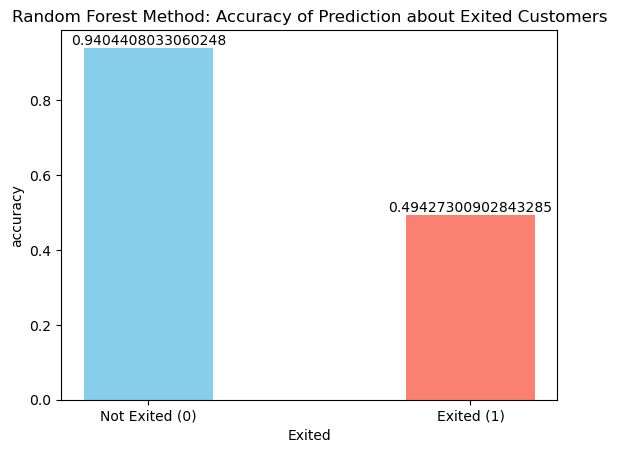

In [212]:
plotting(rf_accuracy_zero, rf_accuracy_one, 'Random Forest Method')

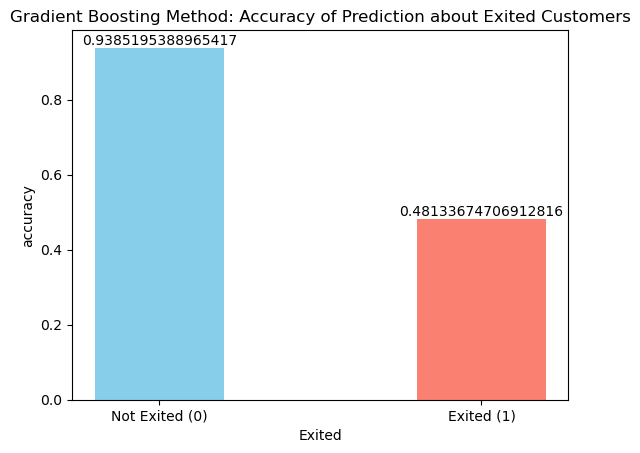

In [213]:
plotting(gb_accuracy_zero, gb_accuracy_one, 'Gradient Boosting Method')

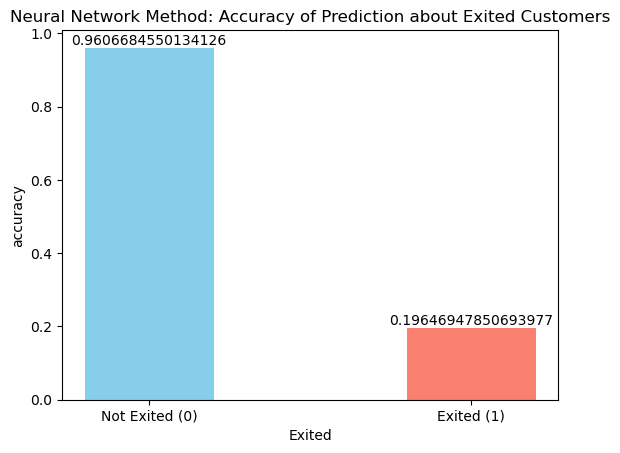

In [214]:
plotting(nn_accuracy_zero, nn_accuracy_one, 'Neural Network Method')